In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [35]:
import sklearn
from sklearn import datasets
from sklearn import preprocessing as prep
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

random_state = 42

In [36]:
wineData = datasets.load_wine()

In [37]:
#split the data into training and testing sets
#I chose a train test split of 80%-20% since the dataset is relatively small
X_train, X_test, y_train, y_test = train_test_split(wineData.data, wineData.target, test_size = 0.2, random_state = random_state)
y_train = to_categorical(y_train)
scaler = prep.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [38]:
model = Sequential()
model.add(Input(shape=(None,) + X_train.shape[1:]))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(wineData.target_names.size, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=5e-3),
    metrics=['accuracy']
)

In [39]:
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=75)

Epoch 1/75
4/4 [==============================] - 1s 78ms/step - loss: 1.0919 - accuracy: 0.4016 - val_loss: 1.0870 - val_accuracy: 0.3333
Epoch 2/75
4/4 [==============================] - 0s 13ms/step - loss: 1.0180 - accuracy: 0.7480 - val_loss: 1.0030 - val_accuracy: 0.6000
Epoch 3/75
4/4 [==============================] - 0s 13ms/step - loss: 0.9627 - accuracy: 0.8031 - val_loss: 0.9546 - val_accuracy: 0.8000
Epoch 4/75
4/4 [==============================] - 0s 13ms/step - loss: 0.8992 - accuracy: 0.8898 - val_loss: 0.9166 - val_accuracy: 0.7333
Epoch 5/75
4/4 [==============================] - 0s 13ms/step - loss: 0.8483 - accuracy: 0.8583 - val_loss: 0.8882 - val_accuracy: 0.4000
Epoch 6/75
4/4 [==============================] - 0s 13ms/step - loss: 0.7825 - accuracy: 0.8346 - val_loss: 0.8393 - val_accuracy: 0.4667
Epoch 7/75
4/4 [==============================] - 0s 13ms/step - loss: 0.7158 - accuracy: 0.8268 - val_loss: 0.7863 - val_accuracy: 0.6000
Epoch 8/75
4/4 [===========

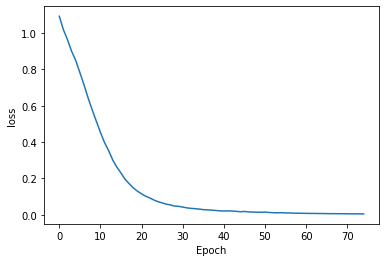

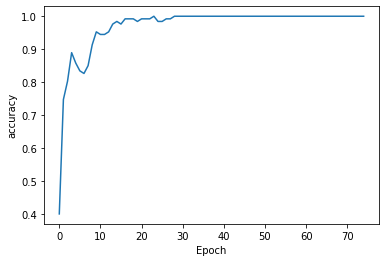

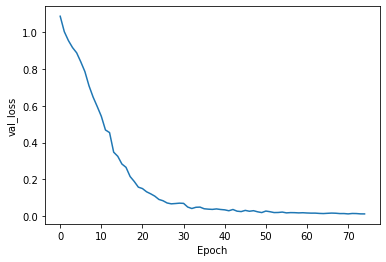

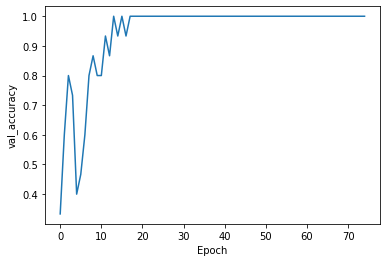

In [40]:
def plot_history(h):
    for k in h.keys():
        plt.figure()
        plt.plot(h[k])
        plt.xlabel("Epoch")
        plt.ylabel(k)
        plt.show()
        plt.close()
        
plot_history(hist.history)

In [41]:
X_test = scaler.transform(X_test)
y_test = to_categorical(y_test)
y_pred = model.predict(X_test, batch_size=250 , verbose=0)
#classification report for the model
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
#The model seems to predict everything correctly

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

